In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("26100319_2.ipynb")

# Assignment Instructions:

*   You are  **not allowed to use for loops** anywhere in this assignment, any use of for loops will give you a 0 in the question
*   You are not allowed to answer any question by hard-coding the values. Any attempt to do so will give you a 0 in that question

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.
* Write your answers in place of `...`
* Rename this file to `your_roll_number_DA2_1.ipynb` and upload a zip file with **only** the two notebooks on LMS. The zip file should be renamed to `your_roll_number_DA2.zip`





In [2]:
"""Assignment Imports"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re


### What makes a movie a great movie? Lets get started with analyzing the IMDb dataset to determine what makes a movie great. By examining various factors such as ratings, box office performance, genres, and more, we will uncover the characteristics of top movies and extract interesting insights.
### Using these datadriven insights, let's see if we can plan a movie of our own.

## **Use of for loops to traverse the dataset is not allowed!**

**Question 0:** Read the dataframe `imdb_top_1000.csv` and store it in a variable `df` and print the first 5 rows

In [3]:
df = pd.read_csv('imdb_top_1000.csv')
print(df.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [4]:
grader.check("q1")

q1 results: All test cases passed!

## Data Cleaning
**Question 2a:** We all know that Null values are a huge problem. Therefore, we shall begin our data cleaning process by finding all the rows that contain Null values. First, find all the null values associated with each column and `print` the results, then find the total null values in the dataframe and store the results in a variable called `numOfNullVals`.

In [5]:
null_values_per_column = df.isnull().sum()
print(null_values_per_column)

numOfNullVals = null_values_per_column.sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [6]:
grader.check("q2")

q2 results: All test cases passed!

**Question 2b:** Since we lose alot of data by removing all our null values,let's see if there is a way we can replace our null value columns. For the null value columns that have a numerical data type, replace the null values with the mean of the remaining values.

In [7]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].apply(lambda col: col.fillna(col.mean()))

In [8]:
grader.check("q2b")

q2b results: All test cases passed!

**Question 2c:** Do any of the remaining columns contain null values, if so drop all the null values from the dataframe.

In [9]:
null_values_remaining = df.isnull().sum()

df = df.dropna()

In [10]:
grader.check("q2c")

q2c results: All test cases passed!

**Question 3:** We don't need all the columns for data analysis, find the `Poster_Link` column and remove it from the dataset.

In [11]:
df = df.drop(columns=['Poster_Link'])

In [12]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4a** Before we do EDA, we need to make the data usable. For example the values in `runtime` are in the form `142 min`, change this to `142` and change all the values in this column into integers.

In [13]:
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype('int64')

In [14]:
grader.check("q4a")

q4a results: All test cases passed!

**Question 4b** Some of our columns are not stored correctly and we cannot do data analysis unless we fix them. The column 'gross' has data values in the format '134,966,411', change this to 134966411 and change all the values in this column into float.

In [15]:
df['Gross'] = df['Gross'].str.replace(',', '').astype('float64')

In [16]:
grader.check("q4b")

q4b results: All test cases passed!

**Question 4c** Find all the unique values associated with the `Certificate` column and and replace each with a number (starting from 0 and so on, this is similar to the one-hot-encoding mechansim you have studied in class). For example `U` might be replaced with `2` and so on. The following function may be helpful in this regard: 'https://pandas.pydata.org/docs/reference/api/pandas.factorize.html'

In [17]:
df['Certificate'], unique_values = pd.factorize(df['Certificate'])

In [18]:
grader.check("q4c")

q4c results: All test cases passed!

**Question 5** Before we start we need to find a way to find all the unique genres. Create a variable called `unique_genres` and store all the genres in it. Make sure that the genres are saved in alphabetical order (i.e `['Action','Adventure',...]`). You **are allowed** to use for loops for  this part, (though this question can be solved without it)  

In [19]:
all_genres = []

for genre_list in df['Genre']:
    all_genres.extend(genre_list.split(','))

unique_genres = sorted(set(genre.strip() for genre in all_genres))

In [20]:
grader.check("q5")

q5 results: All test cases passed!

**Question 5a**: Create a column against each value in `unique_genres` ,and populate the column with `1` if the movie belongs to that genre and `0` otherwise.  You **are allowed** to use for loops for  this part, (though this question can be solved without it using https://pandas.pydata.org/docs/reference/api/pandas.Series.str.get_dummies.html)  

In [21]:
for genre in unique_genres:
    df[genre] = df['Genre'].apply(lambda x: 1 if genre in [g.strip() for g in x.split(',')] else 0)

In [22]:
grader.check("q5a")

q5a results: All test cases passed!

**Question 5b**: Since we no longer need the  `Genre`column, remove it from `df`

In [23]:
df = df.drop(columns=['Genre'])

In [24]:
grader.check("q5b")

q5b results: All test cases passed!

**Question 6a:** Then in order to make it easier to analyze data, Make all the
column values lowercase, for example `Runtime` should be `runtime`

In [25]:
df.columns = df.columns.str.lower()

In [26]:
grader.check("q6")

q6 results: All test cases passed!

**Question 6b:** Replace the values in the `released_year`column and round them to the corresponding decade. For example movies that were released in `1991` and `1995` will now both be replaced with `1990`. Before doing this, change the `released_year` column into a numerical dataType, (If some of the values are non-numerical replace them with `nan`). 

After doing the above task check if there are `null` or `nan` values in the dataframe, if so drop all the rows containing such values

In [27]:
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce')
df['released_year'] = df['released_year'].apply(lambda x: np.floor(x / 10) * 10 if not np.isnan(x) else np.nan)

null_values_remaining = df.isnull().sum()
df = df.dropna()

In [28]:
grader.check("q6b")

q6b results: All test cases passed!

## Data Analysis:
### Lets get started with making the greatest movie of all time

**Question 7:** What is the highest-rated movie in the `thriller` genre according to `imdb_rating`? If two movies have the same `imdb_rating` , please select the one that comes first alphabetically. store the result in `top_thriller_movie`. The result should be a single row, containing the top thriller movie.

In [29]:
thriller_movies = df[df['thriller'] == 1]
top_thriller_movie = thriller_movies.loc[thriller_movies['imdb_rating'].idxmax()]
top_thriller_movie = thriller_movies.sort_values(by=['imdb_rating', 'series_title'], ascending=[False, True]).iloc[0]

In [30]:
grader.check("q7")

q7 results: All test cases passed!

**Question 8**: Now that we have our basic analysis tools in the bag, lets get started with choosing our director.

Which director should we chooose to direct our movie? Since we aren't sure which directors will respond to our request (due to budget constraints we will be asking them to direct it for free), lets find the top 10 directors who have the highest average `imdb_rating`?Note that average here refers to the mean.

Store the results in a list called `top_directors`.


In [31]:
average_ratings = df.groupby('director')['imdb_rating'].mean()
top_directors = average_ratings.sort_values(ascending=False).head(10).index.tolist()

In [32]:
grader.check("q8")

q8 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 8b**: Do you think IMBD Rating is an appropriate way to determine who the top director is? If so why? Is there a better column or combination of columns which can be used to determine who the best director is? (Since we don't want a director who isn't the absolute best)

In [33]:
"""I think that IMDB ratings alone aren't enough to determine the top directors since it can be subejct to Bias, subjectivity and skewed responses based on Genre. A Better idea is to use a combination of meta score, gross, IMDB and no of votes."""

"I think that IMDB ratings alone aren't enough to determine the top directors since it can be subejct to Bias, subjectivity and skewed responses based on Genre. A Better idea is to use a combination of meta score, gross, IMDB and no of votes."

<!-- END QUESTION -->

**Question 9**:Since we want our movie to be highly rated and also highly profitable,lets find the star who has the net highest grossing films of all time.

So take the ` 'star1', 'star2', 'star3', 'star4'`  and `gross` columns and combine them into a single dataFrame called `star_df` which has 2 columns `star` containing the name of the top actor and `gross` containing the net gross values their films have earned. (Note: The net gross value refers to the total amount that all their films have earned combined)

You may use the melt operation (https://pandas.pydata.org/docs/reference/api/pandas.melt.html)  to solve the question, though it is not necessary (nor needed ) to use it.

In [34]:
star_df = pd.melt(df, id_vars='gross', value_vars=['star1', 'star2', 'star3', 'star4'], var_name='star_position', value_name='star')

star_df = star_df.dropna(subset=['star'])
star_df = star_df.groupby('star')['gross'].sum().reset_index()
star_df = star_df.sort_values(by='gross', ascending=False)

In [35]:
grader.check("q9a")

q9a results: All test cases passed!

**Question 9.2:** Use star_df to find who the highest grossing actor is and store the result (i.e the same of the actor) in the `movie_lead` variable

In [39]:
highest_grossing_actor = star_df.loc[star_df['gross'].idxmax()]
movie_lead = highest_grossing_actor['star']
print(movie_lead)

Robert Downey Jr.


In [37]:
assert movie_lead.strip() == "Robert Downey Jr.", "movie_lead should be 'Robert Downey Jr.'"

In [38]:
grader.check("q9b")

q9b results:
    q9b - 1 result:
        ❌ Test case failed
        Trying:
            assert movie_lead.strip() == 'Robert Downey Jr.', "movie_lead should be 'Robert Downey Jr.'"
        Expecting:
            Robert Downey Jr.
        **********************************************************************
        Line 1, in q9b 0
        Failed example:
            assert movie_lead.strip() == 'Robert Downey Jr.', "movie_lead should be 'Robert Downey Jr.'"
        Expected:
            Robert Downey Jr.
        Got nothing

**Question 10:** As data scientists, every decision we make will be datadriven, including the runtime of our movie.
First add a new column `is_long` to indicate if the movie runtime is greater than 150 minutes.
Store `1` if the movie is greater than 150 and 0 otherwise. We will use this in our visualization section later.


In [40]:
df['is_long'] = (df['runtime'] > 150).astype(int)

In [41]:
grader.check("q10")

q10 results: All test cases passed!

<!-- BEGIN QUESTION -->

# Data Visualization
**Question 11**: Use a heatmap of the different genres to find out how they are coorleated to one another. Store the results of your correlation matrix in `correlation_matrix`


Correlation matrix:
             action  adventure  animation  biography    comedy     crime  \
action     1.000000   0.335872   0.025611  -0.104451 -0.149773  0.023853   
adventure  0.335872   1.000000   0.313493  -0.137316  0.050030 -0.240252   
animation  0.025611   0.313493   1.000000  -0.071212  0.081405 -0.085136   
biography -0.104451  -0.137316  -0.071212   1.000000 -0.151772 -0.005714   
comedy    -0.149773   0.050030   0.081405  -0.151772  1.000000 -0.093726   
crime      0.023853  -0.240252  -0.085136  -0.005714 -0.093726  1.000000   
drama     -0.360877  -0.462580  -0.341958   0.204933 -0.215315  0.094292   
family    -0.108709   0.108718   0.197961  -0.043589  0.002614 -0.126421   
fantasy   -0.010738   0.146021   0.112118  -0.103602 -0.001669 -0.115864   
film-noir -0.052849  -0.056064  -0.032672  -0.040254 -0.059677  0.064269   
history   -0.057231  -0.080231  -0.071221   0.314253 -0.130086 -0.104734   
horror    -0.053635  -0.038151  -0.046476  -0.057262 -0.044700 -0.07

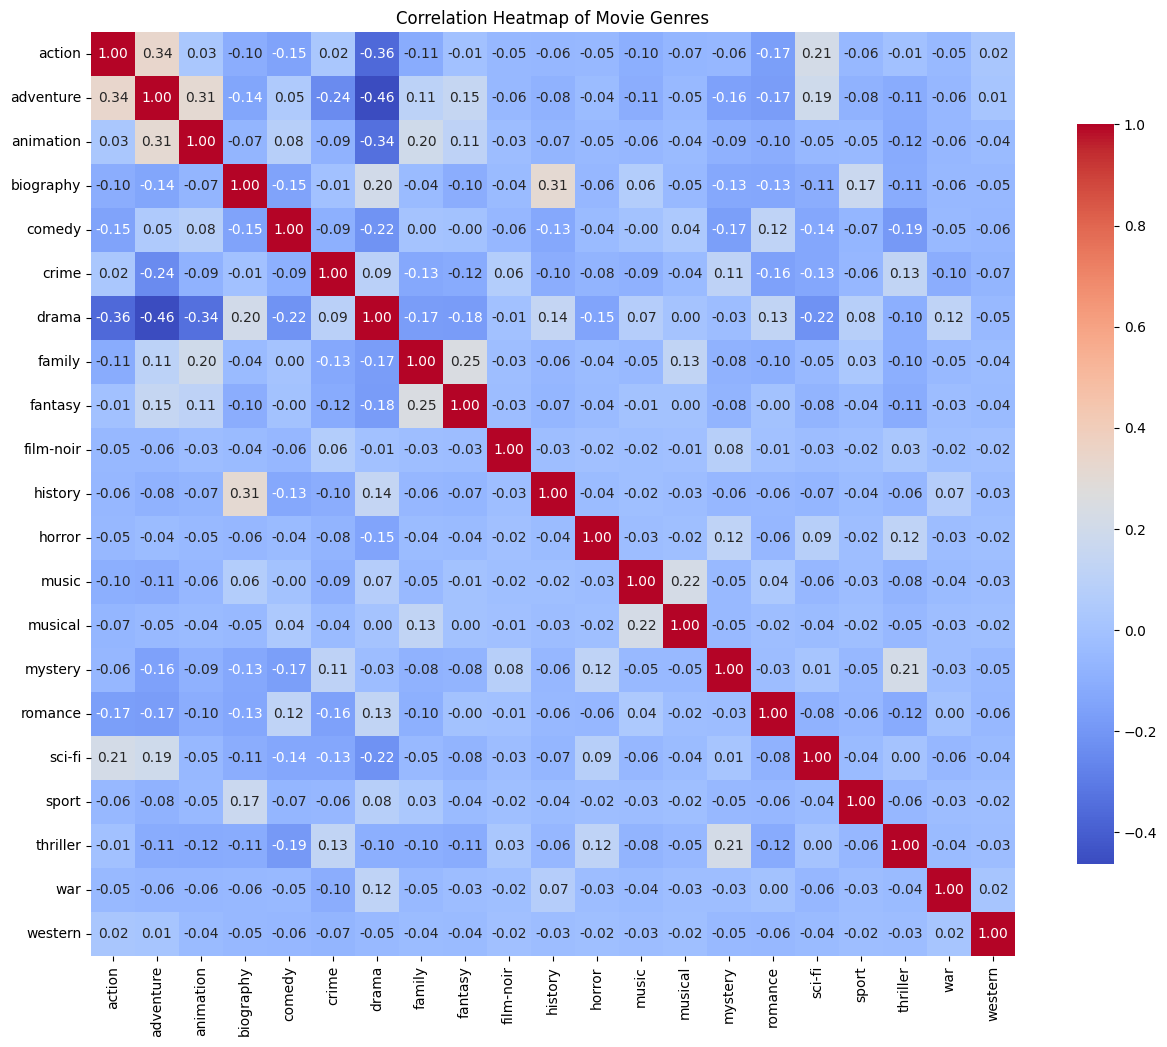

In [42]:
unique_genres = [genre.lower() for genre in unique_genres]
correlation_matrix = df[[col for col in df.columns if col in unique_genres]].corr()

print("Correlation matrix:")
print(correlation_matrix)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Movie Genres')
plt.show()

<!-- END QUESTION -->

**Question 12**: Since it is difficult to determine an exact runtime for our movie, lets aim that our movie runtime be between the 25th and 75th percentile of movies that are lower than 150 mins.
Plot a histplot showing the distribution of runtimes for movies. Find the 25th and 75th percentile and store it in a tuple `possible_runtime` in the format (25th percentile, 75th percentile)

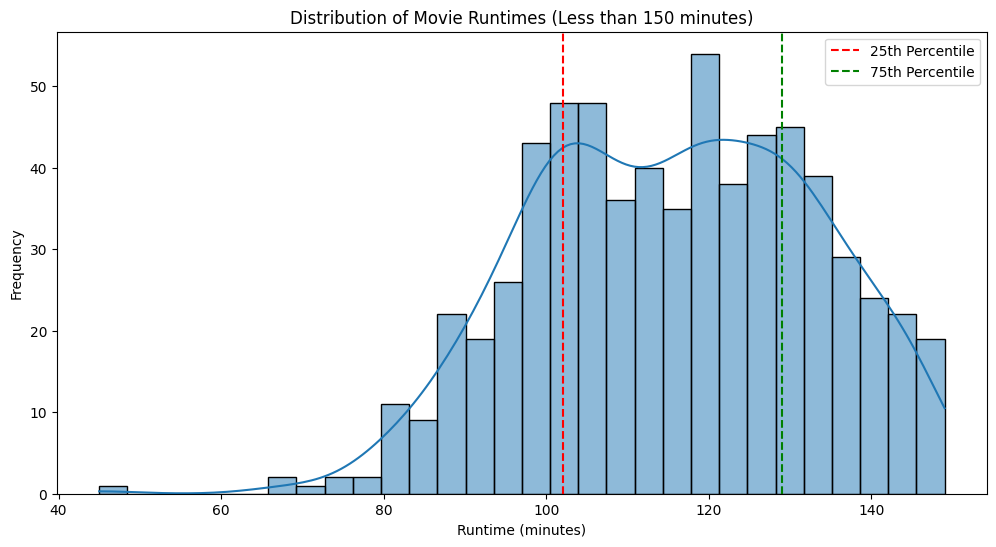

In [43]:
filtered_movies = df[df['runtime'] < 150]
twenty_fifth_percentile = filtered_movies['runtime'].quantile(0.25)
seventy_fifth_percentile = filtered_movies['runtime'].quantile(0.75)

possible_runtime = (twenty_fifth_percentile, seventy_fifth_percentile)

plt.figure(figsize=(12, 6))
sns.histplot(filtered_movies['runtime'], bins=30, kde=True)

plt.title('Distribution of Movie Runtimes (Less than 150 minutes)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')

plt.axvline(twenty_fifth_percentile, color='r', linestyle='--', label='25th Percentile')
plt.axvline(seventy_fifth_percentile, color='g', linestyle='--', label='75th Percentile')
plt.legend()
plt.show()

In [44]:
grader.check("q12")

q12 results: All test cases passed!

**Question 13**: Since we're aiming to make the highest grossing and highest rated movie of all time, Lets look at the previous movies that have met the mark. Plot the imbd ratings for the 10 highest grossing movies, and if any of these movie(s) have a rating greater than 9.5 store it in `movie_to_beat`, if there is no such movie, then movie_to_beat should be `""`

C:\Users\razah\AppData\Local\Temp\ipykernel_42164\1847905711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='series_title', y='imdb_rating', data=top_grossing_movies, palette='viridis')


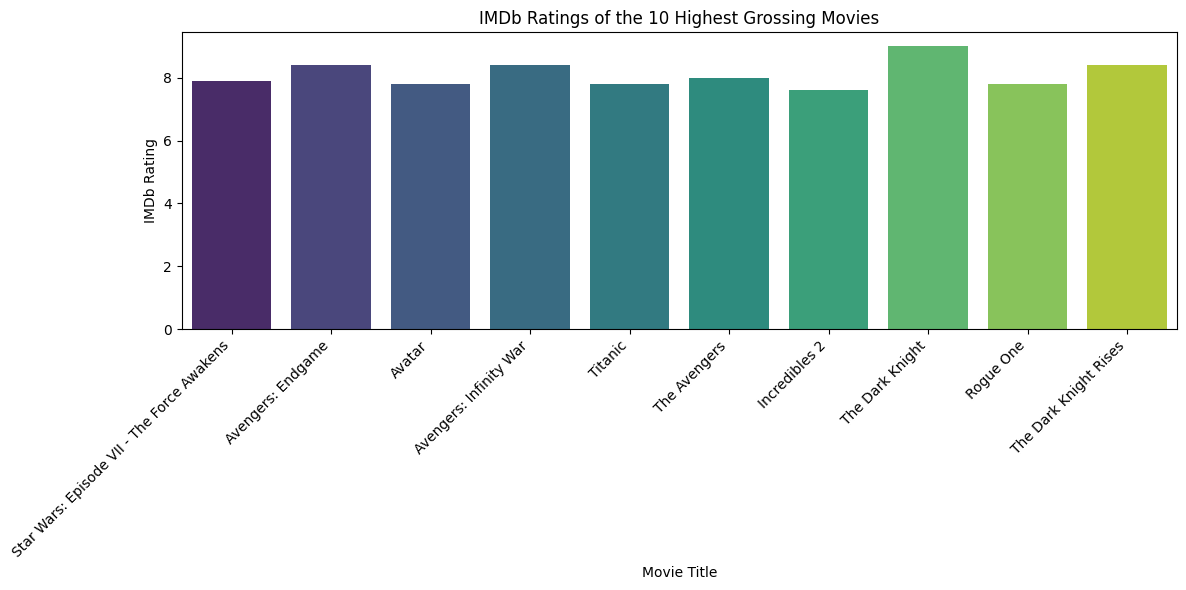

In [46]:
top_grossing_movies = df.nlargest(10, 'gross')
plt.figure(figsize=(12, 6))
sns.barplot(x='series_title', y='imdb_rating', data=top_grossing_movies, palette='viridis')

plt.title('IMDb Ratings of the 10 Highest Grossing Movies')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Movie Title')
plt.ylabel('IMDb Rating')
plt.tight_layout()
plt.show()

movie_to_beat = top_grossing_movies[top_grossing_movies['imdb_rating'] > 9.5]

if not movie_to_beat.empty:
    movie_to_beat = movie_to_beat.iloc[0]['title']
else:
    movie_to_beat = ""

In [47]:
grader.check("q13")

q13 results: All test cases passed!

**Question 14**: Make 2 plots: a scatter plot and a line plot to determine the relationship between runtime and imbd rating, and evaluate which plot better describes the relationship, in a variable called `best_plot` store either `scatter` or `line`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


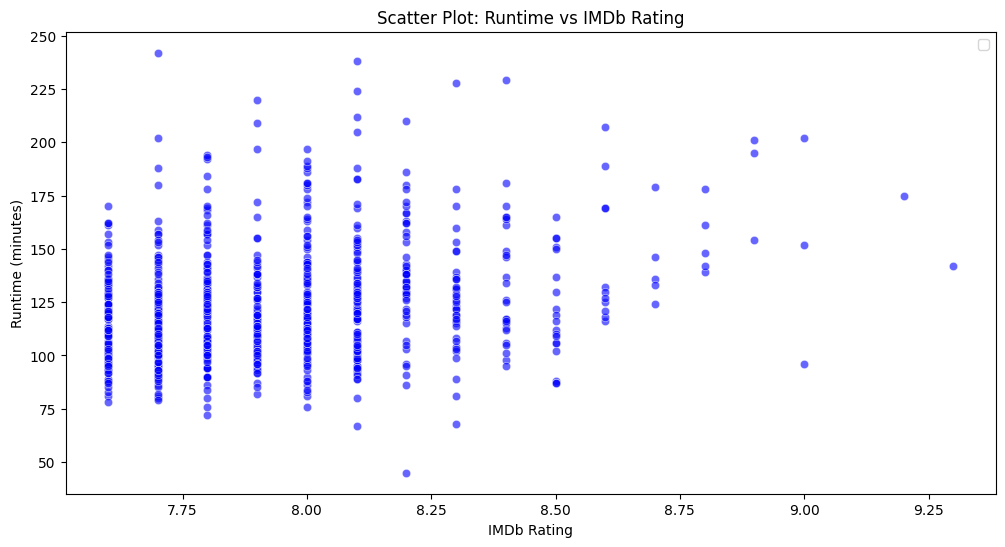

C:\Users\razah\AppData\Local\Temp\ipykernel_42164\2585739167.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='imdb_rating', y='runtime', data=df, color='green', marker='o', estimator='mean', ci=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


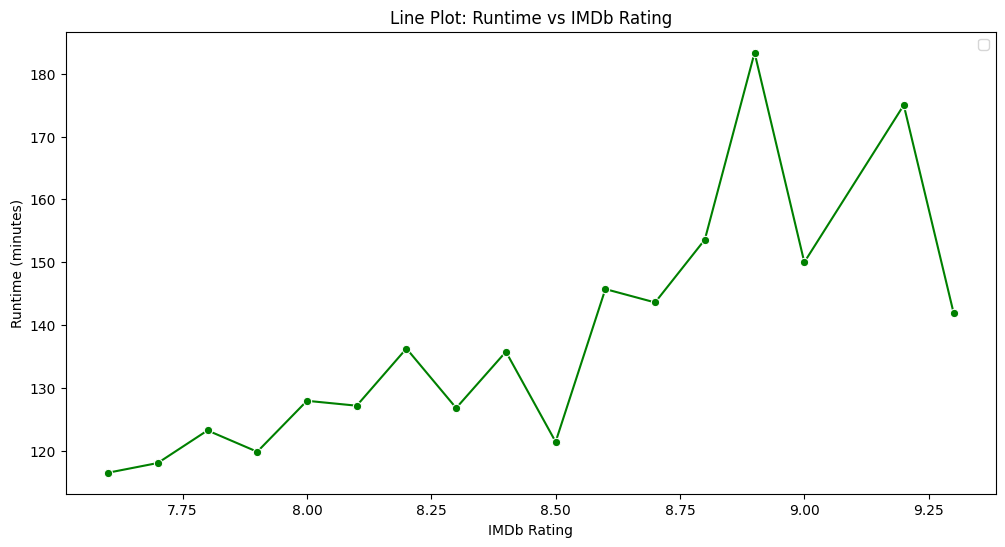

In [48]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='imdb_rating', y='runtime', data=df, color='blue', alpha=0.6)
plt.title('Scatter Plot: Runtime vs IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Runtime (minutes)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='imdb_rating', y='runtime', data=df, color='green', marker='o', estimator='mean', ci=None)
plt.title('Line Plot: Runtime vs IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Runtime (minutes)')
plt.legend()
plt.show()

In [49]:
best_plot = 'scatter'

**Question 15**: Plot the count of movies that have been released across the decades using a bar chart. Correspondingly use a dictionary called `year_counts' to keep track of {released year : total movies released}

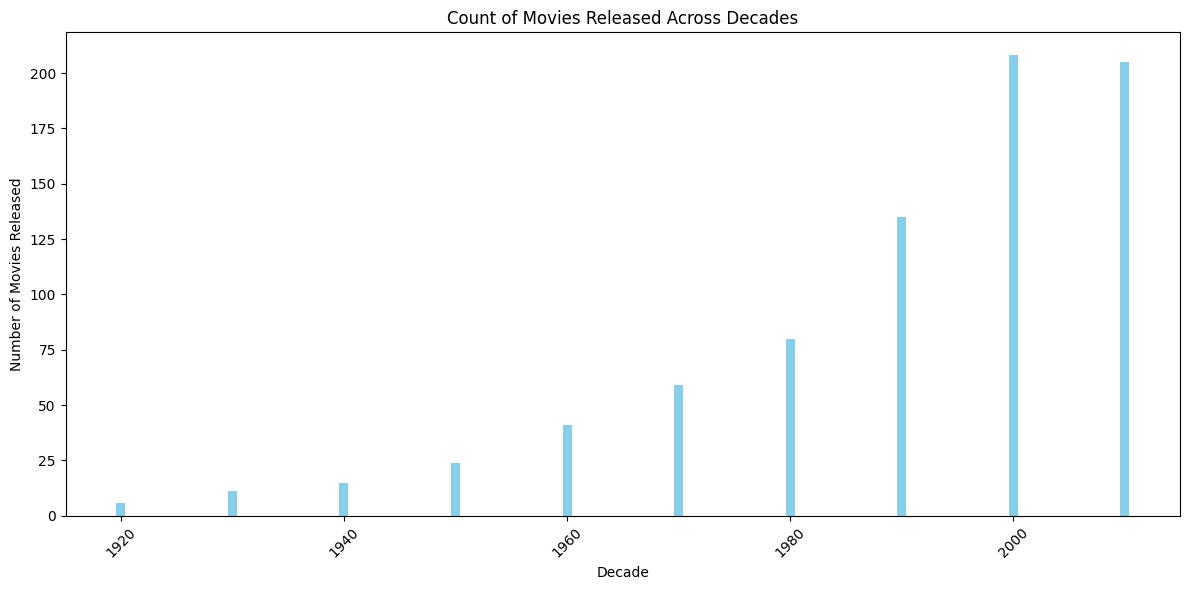

In [50]:
df['decade'] = (df['released_year'] // 10) * 10
year_counts = df['decade'].value_counts().sort_index().to_dict()

plt.figure(figsize=(12, 6))
plt.bar(year_counts.keys(), year_counts.values(), color='skyblue')
plt.title('Count of Movies Released Across Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
grader.check("q15")

q15 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 16**: Use a violin plot to plot the distribution of imbd ratings wrt to release year.

C:\Users\razah\AppData\Local\Temp\ipykernel_42164\1206509999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='released_year', y='imdb_rating', data=df, palette='muted', scale='count')
C:\Users\razah\AppData\Local\Temp\ipykernel_42164\1206509999.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='released_year', y='imdb_rating', data=df, palette='muted', scale='count')


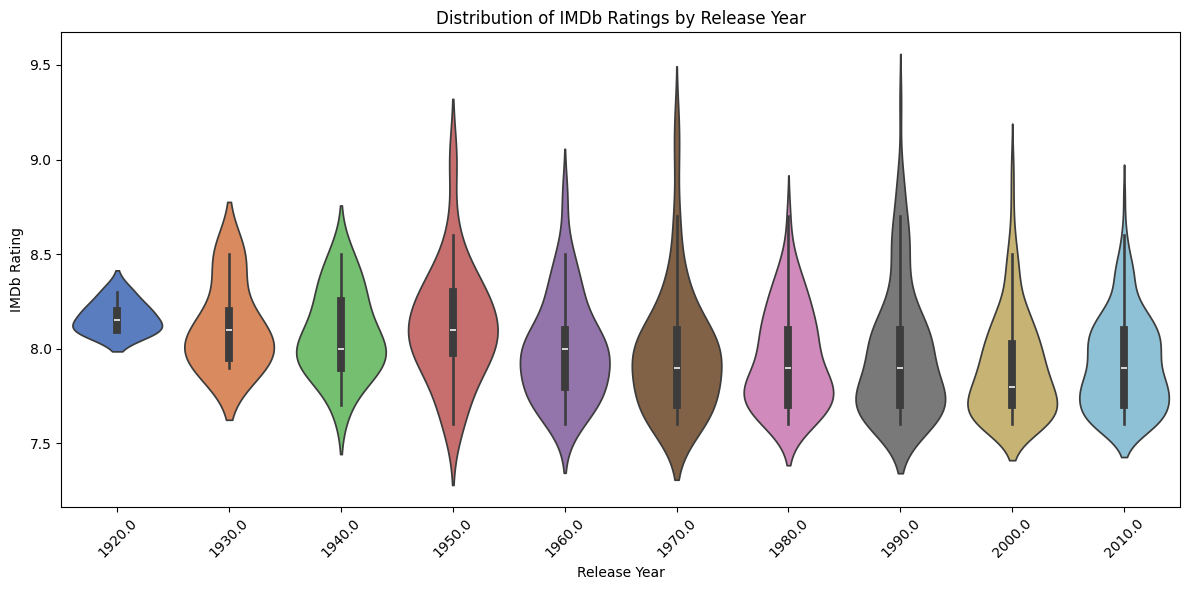

In [52]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='released_year', y='imdb_rating', data=df, palette='muted', scale='count')

plt.title('Distribution of IMDb Ratings by Release Year')
plt.xlabel('Release Year')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are some submission instructions.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)